In [2]:
from deepface import DeepFace
from deepface.basemodels import VGGFace, OpenFace, Facenet, FbDeepFace
from deepface.commons import functions

import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [3]:
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
  try:
    tf.config.experimental.set_memory_growth(gpus[0], True)
  except RuntimeError as e:
    print(e)  

In [4]:
model = VGGFace.loadModel()
#model = Facenet.loadModel()
#model = OpenFace.loadModel()
#model = FbDeepFace.loadModel()

In [5]:
input_shape = model.layers[0].input_shape[1:3]

print("model input shape: ", model.layers[0].input_shape[1:])
print("model output shape: ", model.layers[-1].input_shape[-1])

model input shape:  (224, 224, 3)
model output shape:  2622


In [8]:
img1 = functions.detectFace("dataset/minsu.jpg", input_shape)
img1_representation = model.predict(img1)[0,:]

img2 = functions.detectFace("dataset/minsu3.jpg", input_shape, enforce_detection=False)
img2_representation = model.predict(img2)[0,:]

In [9]:
distance_vector = np.square(img1_representation - img2_representation)
print(distance_vector)

distance = np.sqrt(distance_vector.sum())
print("Euclidean distance: ",distance)

[1.0244495e-04 1.1519435e-04 6.5972672e-06 ... 1.8619789e-05 2.2577999e-04
 2.3530301e-04]
Euclidean distance:  0.62592393


In [10]:
img1_graph = []; img2_graph = []; distance_graph = []

for i in range(0, 200):
	img1_graph.append(img1_representation)
	img2_graph.append(img2_representation)
	distance_graph.append(distance_vector)

img1_graph = np.array(img1_graph)
img2_graph = np.array(img2_graph)
distance_graph = np.array(distance_graph)

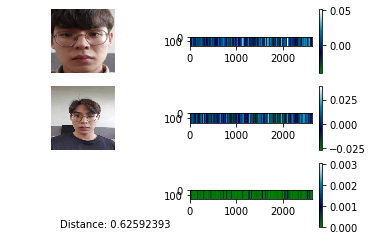

In [11]:
fig = plt.figure()

ax1 = fig.add_subplot(3,2,1)
plt.imshow(img1[0][:,:,::-1])
plt.axis('off')

ax2 = fig.add_subplot(3,2,2)
im = plt.imshow(img1_graph, interpolation='nearest', cmap=plt.cm.ocean)
plt.colorbar()

ax3 = fig.add_subplot(3,2,3)
plt.imshow(img2[0][:,:,::-1])
plt.axis('off')

ax4 = fig.add_subplot(3,2,4)
im = plt.imshow(img2_graph, interpolation='nearest', cmap=plt.cm.ocean)
plt.colorbar()

ax5 = fig.add_subplot(3,2,5)
plt.text(0.35, 0, "Distance: %s" % (distance))
plt.axis('off')

ax6 = fig.add_subplot(3,2,6)
im = plt.imshow(distance_graph, interpolation='nearest', cmap=plt.cm.ocean)
plt.colorbar()

plt.show()